In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm


In [2]:
# reading the train data
train=pd.read_csv("/content/train.csv")
train.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [3]:
train.shape

(13000, 28)

In [4]:
# reading the test data
test=pd.read_csv("/content/test.csv")
test.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


In [5]:
print(train.columns,train.shape)
print('\n')
print(test.columns,test.shape)

Index(['id', 'categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit', 'result'],
      dtype='object') (13000, 28)


Index(['id', 'categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit'],
      dtype='object') (7000, 27)


In [6]:
# saving the ID column 
train_ID = train['id']
test_ID = test['id']

# dropping the ID column as it is unnecessary for the prediction process
train.drop("id",axis=1,inplace=True)
test.drop("id",axis=1,inplace=True)

In [7]:
print(train.shape)
print(test.shape)

(13000, 27)
(7000, 26)


In [8]:
train.nunique(axis=0)

categoryA         167
categoryB           2
categoryC        2212
categoryD           3
categoryE          25
categoryF           3
featureA           23
featureB           23
featureC           19
featureD           23
featureE           23
featureF           23
featureG           23
featureH           11
featureI           23
compositionA        5
compositionB       21
compositionC       23
compositionD        9
compositionE       22
compositionF       20
compositionG       15
compositionH       22
compositionI       23
compositionJ       21
unit               19
result          10329
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoryA     13000 non-null  object 
 1   categoryB     13000 non-null  object 
 2   categoryC     13000 non-null  object 
 3   categoryD     13000 non-null  object 
 4   categoryE     13000 non-null  object 
 5   categoryF     13000 non-null  object 
 6   featureA      12936 non-null  float64
 7   featureB      12936 non-null  float64
 8   featureC      12936 non-null  float64
 9   featureD      12936 non-null  float64
 10  featureE      12936 non-null  float64
 11  featureF      13000 non-null  int64  
 12  featureG      12936 non-null  float64
 13  featureH      12936 non-null  float64
 14  featureI      12936 non-null  float64
 15  compositionA  12936 non-null  float64
 16  compositionB  12936 non-null  float64
 17  compositionC  12936 non-null  float64
 18  compositionD  12936 non-nu

In [10]:
train.dtypes.value_counts()

float64    19
object      7
int64       1
dtype: int64

In [11]:
# coverting the column from object to category
train = train.astype({'categoryA':'category', 'categoryB': 'category','categoryC':'category','categoryD':'category','categoryE':'category','categoryF':'category','unit':'category'})
train.dtypes

categoryA       category
categoryB       category
categoryC       category
categoryD       category
categoryE       category
categoryF       category
featureA         float64
featureB         float64
featureC         float64
featureD         float64
featureE         float64
featureF           int64
featureG         float64
featureH         float64
featureI         float64
compositionA     float64
compositionB     float64
compositionC     float64
compositionD     float64
compositionE     float64
compositionF     float64
compositionG     float64
compositionH     float64
compositionI     float64
compositionJ     float64
unit            category
result           float64
dtype: object

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
featureA,12936.0,1.165592e+05,1.465020e+05,-8.374975e+04,5.674475e+04,7.580838e+04,7.580838e+04,5.822110e+05
featureB,12936.0,4.526278e+00,3.180817e+00,1.064468e+00,4.363288e+00,4.457840e+00,4.457840e+00,2.598219e+01
featureC,12936.0,1.329723e-01,2.641483e-01,0.000000e+00,5.717646e-03,5.717646e-03,3.240702e-02,7.291935e-01
featureD,12936.0,1.503411e+02,7.509367e+01,1.814855e+01,1.222994e+02,1.222994e+02,1.379766e+02,5.114759e+02
featureE,12936.0,2.644618e+01,6.665619e+00,3.875411e+00,2.462550e+01,3.083191e+01,3.083191e+01,3.876723e+01
featureF,13000.0,2.175385e-01,2.380893e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
featureG,12936.0,2.335366e+12,8.937307e+11,2.887150e+10,1.464510e+12,2.806040e+12,2.806040e+12,3.781700e+12
featureH,12936.0,1.504719e+01,3.200037e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.715892e+01
featureI,12936.0,5.020210e+07,2.412360e+07,5.300380e+05,2.586796e+07,5.094169e+07,7.117635e+07,7.117635e+07
compositionA,12936.0,1.649227e-01,7.432285e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [13]:
train.skew()

<ipython-input-13-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


featureA         1.306407
featureB         3.797456
featureC         1.795937
featureD         1.003517
featureE        -0.889903
featureF        31.217804
featureG        -1.312239
featureH         1.784785
featureI        -0.646499
compositionA     4.607279
compositionB    -0.802405
compositionC    -0.552444
compositionD     4.783189
compositionE     0.422508
compositionF     3.682130
compositionG     1.205124
compositionH     0.901407
compositionI     1.705621
compositionJ     1.677662
result           1.671125
dtype: float64

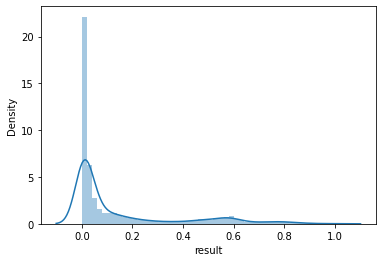



skewness: 1.671125
kurtosis: 1.590801


In [14]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(train.result)
plt.show()
print('\n')
print("skewness: %f" % train['result'].skew())
print("kurtosis: %f" % train ['result'].kurt())

In [15]:
# replacing the value to make it easy for us
train = train.applymap(lambda x: x.replace('catA_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('catB_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('catC_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('catD_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('catE_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('catF_', '') if isinstance(x, str) else x)
train = train.applymap(lambda x: x.replace('unit_', '') if isinstance(x, str) else x)

# display the updated DataFrame
train.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,1,0,718,0,0,0,75808.375,4.457840,0.005718,122.299437,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,6,0.000458
1,1,0,1309,0,0,0,75808.375,4.457840,0.005718,122.299437,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,6,0.000335
2,15,0,1309,0,0,0,75808.375,4.457840,0.005718,122.299437,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,4,0.054072
3,0,0,935,0,0,0,75808.375,4.457840,0.005718,122.299437,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,5,0.061143
4,22,0,1325,0,2,0,-40055.250,4.363288,0.729194,93.677197,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,15,0.015439


In [16]:
#descriptuve statistics summary of target variable
train['result'].describe()

count    13000.000000
mean         0.144223
std          0.224062
min          0.000000
25%          0.003875
50%          0.027909
75%          0.168678
max          1.000000
Name: result, dtype: float64

In [17]:
train.isnull().sum()

categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        64
featureB        64
featureC        64
featureD        64
featureE        64
featureF         0
featureG        64
featureH        64
featureI        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionG    64
compositionH    64
compositionI    64
compositionJ    64
unit             0
result           0
dtype: int64

In [18]:
# Fill null values using median
train['featureA'].median()
train['featureA'].fillna(train['featureA'].median(),inplace=True)
train['featureB'].median()
train['featureB'].fillna(train['featureB'].median(),inplace=True)
train['featureC'].median()
train['featureC'].fillna(train['featureC'].median(),inplace=True)
train['featureD'].median()
train['featureD'].fillna(train['featureD'].median(),inplace=True)
train['featureE'].median()
train['featureE'].fillna(train['featureE'].median(),inplace=True)
train['featureG'].median()
train['featureG'].fillna(train['featureG'].median(),inplace=True)
train['featureH'].median()
train['featureH'].fillna(train['featureH'].median(),inplace=True)
train['featureI'].median()
train['featureI'].fillna(train['featureI'].median(),inplace=True)

In [19]:
train['compositionA'].median()
train['compositionA'].fillna(train['compositionA'].median(),inplace=True)
train['compositionB'].median()
train['compositionB'].fillna(train['compositionB'].median(),inplace=True)
train['compositionC'].median()
train['compositionC'].fillna(train['compositionC'].median(),inplace=True)
train['compositionD'].median()
train['compositionD'].fillna(train['compositionD'].median(),inplace=True)
train['compositionE'].median()
train['compositionE'].fillna(train['compositionE'].median(),inplace=True)
train['compositionF'].median()
train['compositionF'].fillna(train['compositionF'].median(),inplace=True)
train['compositionG'].median()
train['compositionG'].fillna(train['compositionG'].median(),inplace=True)
train['compositionH'].median()
train['compositionH'].fillna(train['compositionH'].median(),inplace=True)
train['compositionI'].median()
train['compositionI'].fillna(train['compositionI'].median(),inplace=True)
train['compositionJ'].median()
train['compositionJ'].fillna(train['compositionJ'].median(),inplace=True)

In [20]:
train.isnull().sum().sum()

0

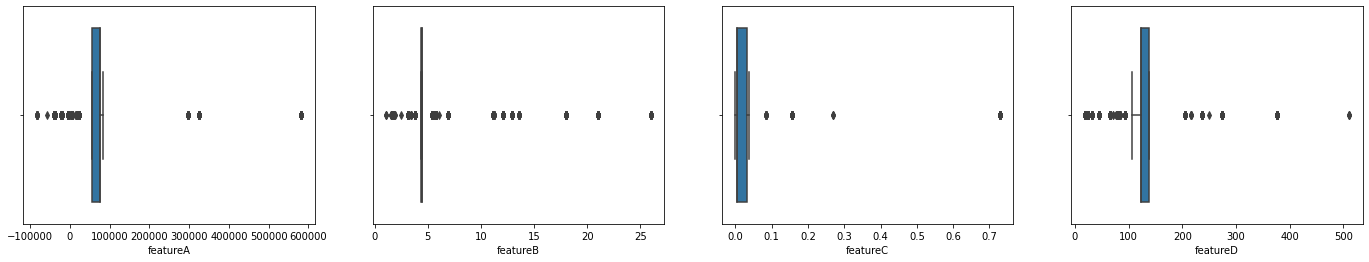

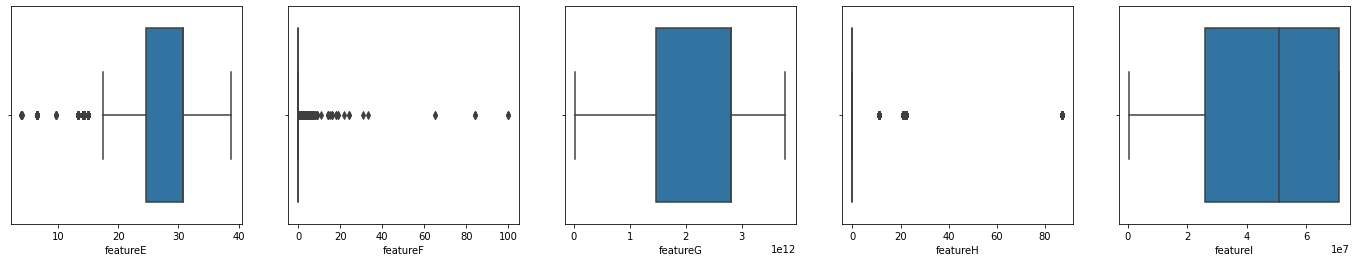

In [21]:
#plotting boxplot to know the outliers of feature data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(train['featureA'])
plt.subplot(1,4,2)
sns.boxplot(train['featureB'])
plt.subplot(1,4,3)
sns.boxplot(train['featureC'])
plt.subplot(1,4,4)
sns.boxplot(train['featureD'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(train['featureE'])
plt.subplot(1,5,2)
sns.boxplot(train['featureF'])
plt.subplot(1,5,3)
sns.boxplot(train['featureG'])
plt.subplot(1,5,4)
sns.boxplot(train['featureH'])
plt.subplot(1,5,5)
sns.boxplot(train['featureI'])
plt.show()

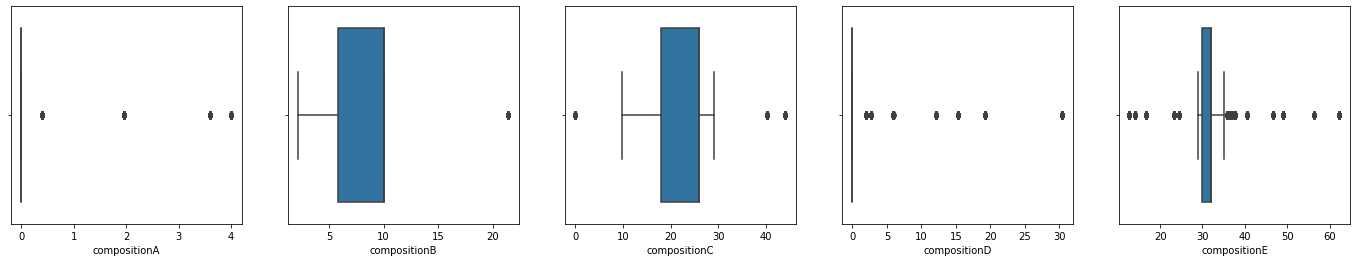

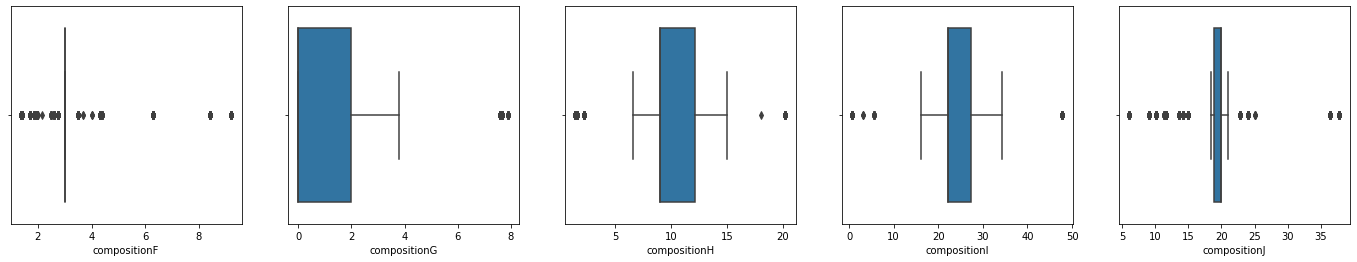

In [22]:
#plotting boxplot to know the outliers of Composition data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(train['compositionA'])
plt.subplot(1,5,2)
sns.boxplot(train['compositionB'])
plt.subplot(1,5,3)
sns.boxplot(train['compositionC'])
plt.subplot(1,5,4)
sns.boxplot(train['compositionD'])
plt.subplot(1,5,5)
sns.boxplot(train['compositionE'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)           
sns.boxplot(train['compositionF'])
plt.subplot(1,5,2)
sns.boxplot(train['compositionG'])
plt.subplot(1,5,3)
sns.boxplot(train['compositionH'])
plt.subplot(1,5,4)
sns.boxplot(train['compositionI'])
plt.subplot(1,5,5)
sns.boxplot(train['compositionJ'])                  
plt.show()

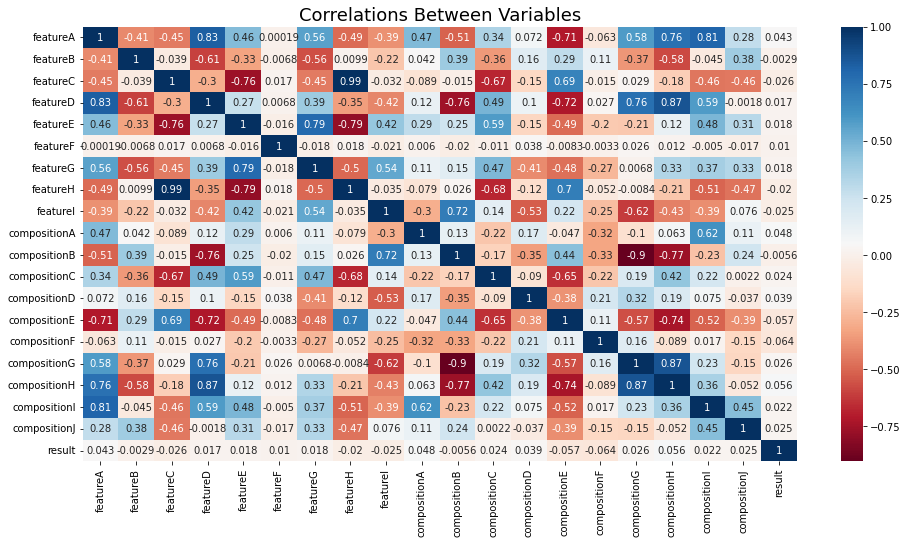

In [23]:
#correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [24]:
# dropping few columns that are unccessary after obeserving correlation matrix
#fD,cI,fH,fE,fI,cG
train = train.drop(['featureD','featureG','featureH','featureI','featureF','compositionG','compositionI'],axis=1)

In [25]:
# Checking and removing any duplicates from the data
train[train.duplicated()]
train.drop_duplicates(inplace=True)
train

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,unit,result
0,1,0,718,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,6,0.000458
1,1,0,1309,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,6,0.000335
2,15,0,1309,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,4,0.054072
3,0,0,935,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,5,0.061143
4,22,0,1325,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.00,14.00,0.0,49.00,3.0,9.00,15.00,15,0.015439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,3,0,639,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,1,0.008260
12996,8,0,445,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,9,0.002395
12997,25,0,445,0,0,1,75808.375,4.457840,0.005718,30.831906,0.0,10.00,26.00,0.0,32.00,3.0,9.00,20.00,12,0.150982
12998,7,0,2322,0,5,0,18927.000,21.007457,0.000387,14.177182,0.0,9.24,13.13,0.0,35.88,1.7,1.45,37.83,8,0.488908


In [26]:
train.nunique() 

categoryA         167
categoryB           2
categoryC        2212
categoryD           3
categoryE          25
categoryF           3
featureA           23
featureB           23
featureC           19
featureE           23
compositionA        5
compositionB       21
compositionC       23
compositionD        9
compositionE       22
compositionF       20
compositionH       22
compositionJ       21
unit               19
result          10329
dtype: int64

In [27]:
train=train.drop(['categoryE'],axis=1)

In [28]:
train["categoryA"].value_counts()

0      839
1      834
3      831
5      804
2      787
      ... 
148      1
161      1
167      1
164      1
83       1
Name: categoryA, Length: 167, dtype: int64

In [29]:
train["categoryC"].value_counts()

2       41
6       38
3       34
13      32
17      31
        ..
2544     1
2471     1
207      1
2750     1
2118     1
Name: categoryC, Length: 2212, dtype: int64

In [30]:
# coverting the column from category to float
train = train.astype({'categoryA':'float','categoryC':'float'})
train.dtypes

categoryA       float64
categoryB        object
categoryC       float64
categoryD        object
categoryF        object
featureA        float64
featureB        float64
featureC        float64
featureE        float64
compositionA    float64
compositionB    float64
compositionC    float64
compositionD    float64
compositionE    float64
compositionF    float64
compositionH    float64
compositionJ    float64
unit             object
result          float64
dtype: object

In [31]:
# retriving num cols after dropping so remainning cols will appear
train_num=train._get_numeric_data()
train_num.head()

,categoryA,categoryC,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,1.0,718.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.000458
1,1.0,1309.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.000335
2,15.0,1309.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.054072
3,0.0,935.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.061143
4,22.0,1325.0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0.015439


In [32]:
# normalizing the numerical columns
train_num = (train_num - train_num.min()) / (train_num.max() - train_num.min())
train_num

,categoryA,categoryC,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,0.005525,0.246901,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.000458
1,0.005525,0.450413,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.000335
2,0.082873,0.450413,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.054072
3,0.000000,0.321625,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.061143
4,0.121547,0.455923,0.065611,0.132389,1.000000,0.320203,0.0,0.302083,0.317821,0.0,0.731422,0.207161,0.402667,0.280492,0.015439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0.016575,0.219697,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.008260
12996,0.044199,0.152893,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.002395
12997,0.138122,0.152893,0.239591,0.136183,0.007841,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.150982
12998,0.038674,0.799242,0.154178,0.800354,0.000531,0.295249,0.0,0.366667,0.298070,0.0,0.466478,0.040921,0.000000,1.000000,0.488908


In [33]:
train_cat = train.select_dtypes(include = object)
train_cat.head()

,categoryB,categoryD,categoryF,unit
0,0,0,0,6
1,0,0,0,6
2,0,0,0,4
3,0,0,0,5
4,0,0,0,15


In [34]:
train_cat.isnull().sum()

categoryB    0
categoryD    0
categoryF    0
unit         0
dtype: int64

In [35]:
train_cat.nunique(axis=0)

categoryB     2
categoryD     3
categoryF     3
unit         19
dtype: int64

In [36]:
train_cat["categoryB"].value_counts()

0    12923
1       10
Name: categoryB, dtype: int64

In [37]:
train_cat["categoryD"].value_counts()

0    12599
1      311
2       23
Name: categoryD, dtype: int64

In [38]:
train_cat["categoryF"].value_counts()

0    12900
1       29
2        4
Name: categoryF, dtype: int64

In [39]:
train_cat["unit"].value_counts()

0     2536
1     1614
3      991
2      991
4      962
5      839
6      834
7      786
8      739
9      661
10     588
11     454
12     348
13     269
14     160
15      96
16      54
17       7
18       4
Name: unit, dtype: int64

In [40]:
print(train_cat.columns)

Index(['categoryB', 'categoryD', 'categoryF', 'unit'], dtype='object')


In [41]:
#dummification for categorical columns
g_d=pd.get_dummies(train_cat)

In [42]:
g_d.head()

,categoryB_0,categoryB_1,categoryD_0,categoryD_1,categoryD_2,categoryF_0,categoryF_1,categoryF_2,unit_0,unit_1,...,unit_17,unit_18,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,unit_9
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_num.columns

Index(['categoryA', 'categoryC', 'featureA', 'featureB', 'featureC',
       'featureE', 'compositionA', 'compositionB', 'compositionC',
       'compositionD', 'compositionE', 'compositionF', 'compositionH',
       'compositionJ', 'result'],
      dtype='object')

In [44]:
# concating the numerical column and updated categorical column 
train_df=pd.concat([g_d,train_num],axis=1)
train_df.head()

,categoryB_0,categoryB_1,categoryD_0,categoryD_1,categoryD_2,categoryF_0,categoryF_1,categoryF_2,unit_0,unit_1,...,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,1,0,1,0,0,1,0,0,0,0,...,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.000458
1,1,0,1,0,0,1,0,0,0,0,...,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.000335
2,1,0,1,0,0,1,0,0,0,0,...,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.054072
3,1,0,1,0,0,1,0,0,0,0,...,0.772573,0.0,0.406250,0.590238,0.0,0.388126,0.207161,0.402667,0.438071,0.061143
4,1,0,1,0,0,1,0,0,0,0,...,0.320203,0.0,0.302083,0.317821,0.0,0.731422,0.207161,0.402667,0.280492,0.015439


In [45]:
train_df.shape

(12933, 42)

MODEL BUILDING WITHOUT IMPORTING FROM SCIKIT-LEARN


In [46]:
import pandas as pd
import numpy as np

class KNeighborsRegressor:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def euclidean_distance(self, X_train, X_test):
        return np.sqrt(np.sum((X_test - X_train)**2, axis=1))
        
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = self.euclidean_distance(self.X_train, X_test.iloc[i])
            neighbors = np.argsort(distances)[:self.n_neighbors]
            neighbors_y = self.y_train.iloc[neighbors]
            y_pred.append(np.mean(neighbors_y))
        return y_pred


In [47]:
# Split data into features and target variable
X = train_df.drop(['result'], axis=1)
y = train_df['result']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the KNeighborsRegressor on the training data
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Use the KNeighborsRegressor to make predictions on the test data
y_pred = knn.predict(X_test)

In [48]:
# y_pred

In [49]:
# Evaluate the performance of the KNN regressor using error metrics
mse = np.mean((y_pred - y_test)**2)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.007966909995444894
MAE: 0.046568905169955675
r2_score: 0.8364965751892265


IMPLEMENTATION OF ERROR METRICS FROM SCRATCH 

In [50]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.8364965751892265
mean_absolute_error: 0.046568905169955675
mean_squared_error: 0.007966909995444894


#Tuning techniques for KNN regression are: 

1.Grid Search

2.Random Search

3.K-Fold Cross Validation

4.Feature Scaling

5.Choosing the value of k

6.Distance Metric

Choosing the value of k: 

The number of neighbors to consider is an important hyperparameter in KNN Regression. A larger value of k can lead to more stable predictions, but may also lead to over-smoothing. On the other hand, a smaller value of k may lead to over-fitting. Therefore, it is important to choose an optimal value of k based on the data. A common technique is to try different values of k and choose the value that gives the best performance on the validation data.

In [51]:
# Choosing the value of k i.e., take k = 2
import pandas as pd
import numpy as np

class KNeighborsRegressor:
    def __init__(self, n_neighbors=2, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def euclidean_distance(self, X_train, X_test):
        return np.sqrt(np.sum((X_test - X_train)**2, axis=1))
        
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = self.euclidean_distance(self.X_train, X_test.iloc[i])
            neighbors = np.argsort(distances)[:self.n_neighbors]
            neighbors_y = self.y_train.iloc[neighbors]
            y_pred.append(np.mean(neighbors_y))
        return y_pred


In [52]:
# Split data into features and target variable
X = train_df.drop(['result'], axis=1)
y = train_df['result']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the KNeighborsRegressor on the training data
knn = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)

# Use the KNeighborsRegressor to make predictions on the test data
y_pred = knn.predict(X_test)

In [53]:
# y_pred

In [54]:
# Evaluate the performance of the KNN regressor using error metrics
mse = np.mean((y_pred - y_test)**2)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.009095103887163907
MAE: 0.04839192196534794
r2_score: 0.8133428599781696


In [55]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.8133428599781696
mean_absolute_error: 0.04839192196534794
mean_squared_error: 0.009095103887163907


#output when k=7

r2 Score: 0.8431095010319025

mean_absolute_error: 0.046033620093701766

mean_squared_error: 0.007644686867359815


#CONCLUSION

when k=5 the r2_score is 83%

while tuning the value of k changes from k=5 to k=2 then the r2_score is 81%

Again the value of k changes from k=2 to k=7 then the r2_score is 84%

from the above 3 different values of k we can say that choosing the right value of k also helpas in increasing the accuracy of the model.

#CONCLUSION

when k=5 the r2_score is 83%

while tuning the value of k changes from k=5 to k=2 then the r2_score is 81%

Again the value of k changes from k=2 to k=7 then the r2_score is 84%

from the above 3 different values of k we can say that choosing the right value of k also helpas in increasing the accuracy of the model.

Distance Metric:

 KNN Regression can use different distance metrics to calculate the distance between data points. The most common distance metrics are Euclidean distance and Manhattan distance. You can experiment with different distance metrics to see which one works best for your data
 

In [56]:
import pandas as pd
import numpy as np

class KNeighborsRegressor:
    def __init__(self, n_neighbors=5, metric='manhattan'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def manhattan_distance(self, X_train, X_test):
       return np.sum(np.abs(X_test - X_train), axis=1)

        
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = self.manhattan_distance(self.X_train, X_test.iloc[i])
            neighbors = np.argsort(distances)[:self.n_neighbors]
            neighbors_y = self.y_train.iloc[neighbors]
            y_pred.append(np.mean(neighbors_y))
        return y_pred


In [57]:
# Split data into features and target variable
X = train_df.drop(['result'], axis=1)
y = train_df['result']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the KNeighborsRegressor on the training data
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

# Use the KNeighborsRegressor to make predictions on the test data
y_pred = knn.predict(X_test)


In [58]:
# y_pred

In [59]:
# Evaluate the performance of the KNN regressor using error metrics
mse = np.mean((y_pred - y_test)**2)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.007877936291974426
MAE: 0.04638053091927732
r2_score: 0.8383225660996092


In [60]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.8383225660996092
mean_absolute_error: 0.04638053091927732
mean_squared_error: 0.007877936291974426


K-Fold Cross Validation:

 K-Fold Cross Validation is a technique that splits the data into K folds and trains the model K times, using K-1 folds for training and 1 fold for validation. This technique helps to evaluate the model's performance on different subsets of data.

In [61]:
import pandas as pd
import numpy as np

class KNeighborsRegressor:
    def __init__(self, n_neighbors=5, metric='manhattan'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def manhattan_distance(self, X_test):
        return np.sum(np.abs(self.X_train - X_test), axis=1)

    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = self.manhattan_distance(X_test.iloc[i])
            neighbors = np.argsort(distances)[:self.n_neighbors]
            neighbors_y = self.y_train.iloc[neighbors]
            y_pred.append(np.mean(neighbors_y))
        return y_pred

    def r_squared(self, y_true, y_pred):
        ssr = np.sum((y_true - y_pred) ** 2)
        sst = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ssr / sst

    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]
        idx = np.arange(n)
        np.random.shuffle(idx)
        X_folds = np.array_split(X.iloc[idx], k)
        y_folds = np.array_split(y.iloc[idx], k)
        scores = []
        for i in range(k):
            X_train = pd.concat(X_folds[:i] + X_folds[i+1:])
            y_train = pd.concat(y_folds[:i] + y_folds[i+1:])
            X_valid = X_folds[i]
            y_valid = y_folds[i]
            self.fit(X_train, y_train)
            y_pred = self.predict(X_valid)
            score = self.r_squared(y_valid, y_pred)
            scores.append(score)
        return scores


In [62]:
# Split data into features and target variable
X = train_df.drop(['result'], axis=1)
y = train_df['result']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the KNeighborsRegressor on the training data
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

# Use the KNeighborsRegressor to make predictions on the test data
#y_pred = knn.predict(X_test)

cv_scores = knn.cross_val_score(X, y, k=5)

print("Cross Validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

# Fit the model on the entire dataset
knn.fit(X, y)

# Make predictions on new data
#X_new = np.array([[0.5, 0.6, 0.7, 0.8]])
X_new = pd.DataFrame([[0.05, 0.06, 0.07, 0.08]])

y_new = knn.predict(X_new)
print("Prediction:", y_new)

Cross Validation scores: [0.8383905228020359, 0.8261803978829059, 0.8543376062630629, 0.8443100999405291, 0.8536786438227393]
Average CV score: 0.8433794541422547
Prediction: [0.0347100754]


In [63]:
# Use the KNeighborsRegressor to make predictions on the test data
y_pred = knn.predict(X_test)

In [64]:
# Calculate mean squared error and R-squared for the test set
#from sklearn.metrics import mean_squared_error, r2_score
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print("Mean squared error:", mse)
#print("R-squared:", r2)

In [65]:
# Evaluate the performance of the KNN regressor using error metrics
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

MSE: 0.0051885727161268816
RMSE: 0.07203174797356289
MAE: 0.03735907825894536
R^2: 0.8935158788725455


In [66]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.8935158788725455
mean_absolute_error: 0.03735907825894536
mean_squared_error: 0.0051885727161268816


Grid Search:

 Grid search is a common hyperparameter tuning technique that searches for the best hyperparameters by testing all possible combinations of a predefined range of hyperparameters. You can use GridSearchCV from sklearn.model_selection module to perform grid search.

In [67]:
"""
import numpy as np
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class KNNRegressor:
  def __init__(self, n_neighbors=5, metric='euclidean'):
   self.n_neighbors = n_neighbors
    self.metric = metric
    
  def fit(self, X_train, y_train):
    self.X_train = X_train
   self.y_train = y_train
    
  def euclidean_distance(self, X_train, X_test):
    return np.sqrt(np.sum((X_test - X_train)**2, axis=1))
    
  def manhattan_distance(self, X_train, X_test):
    return np.sum(np.abs(X_test - X_train), axis=1)
   
  def predict(self, X_test):
   y_pred = []
  for i in range(X_test.shape[0]):
   if self.metric == 'euclidean':
    distances = self.euclidean_distance(self.X_train, X_test.iloc[i])
      elif self.metric == 'manhattan':
        distances = self.manhattan_distance(self.X_train, X_test.iloc[i])
        neighbors = np.argsort(distances)[:self.n_neighbors]
        neighbors_y = self.y_train.iloc[neighbors]
        y_pred.append(np.mean(neighbors_y))
   return y_pred
  
  def score(self, X_test, y_test):
    y_pred = self.predict(X_test)
    return 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
    
  def cross_val_score(self, X_train, y_train, k=5):
    n = X.shape[0]
    idx = np.arange(n)
    np.random.shuffle(idx)
    X_folds = np.array_split(X.iloc[idx], k)
    y_folds = np.array_split(y.iloc[idx], k)
    scores = []
    for i in range(k):
      X_train = pd.concat(X_folds[:i] + X_folds[i+1:])
      y_train = pd.concat(y_folds[:i] + y_folds[i+1:])
      X_valid = X_folds[i]
      y_valid = y_folds[i]
      self.fit(X_train, y_train)
      score = self.score(X_valid, y_valid)
      scores.append(score)
    return np.mean(scores)
    
  def get_params(self, deep=True):
    return {'n_neighbors': self.n_neighbors, 'metric': self.metric}
   
  def set_params(self, **params):
    if 'n_neighbors' in params:
      self.n_neighbors = params['n_neighbors']
      if 'metric' in params:
        self.metric = params['metric']
      return self

  def grid_search(X_train, y_train, param_grid, k=5):
    best_score = -np.inf
    best_params = {}
    param_values = list(product(*param_grid.values()))
    for params in param_values:
      knn = KNNRegressor(n_neighbors=params[0], metric=params[1])
      score = knn.cross_val_score(X_train, y_train, k=k)
      if score > best_score:
        best_score = score
        best_params = {'n_neighbors': params[0], 'metric': params[1]}
    return best_params, best_score
"""

"\nimport numpy as np\nfrom itertools import product\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\n\nclass KNNRegressor:\n  def __init__(self, n_neighbors=5, metric='euclidean'):\n   self.n_neighbors = n_neighbors\n    self.metric = metric\n    \n  def fit(self, X_train, y_train):\n    self.X_train = X_train\n   self.y_train = y_train\n    \n  def euclidean_distance(self, X_train, X_test):\n    return np.sqrt(np.sum((X_test - X_train)**2, axis=1))\n    \n  def manhattan_distance(self, X_train, X_test):\n    return np.sum(np.abs(X_test - X_train), axis=1)\n   \n  def predict(self, X_test):\n   y_pred = []\n  for i in range(X_test.shape[0]):\n   if self.metric == 'euclidean':\n    distances = self.euclidean_distance(self.X_train, X_test.iloc[i])\n      elif self.metric == 'manhattan':\n        distances = self.manhattan_distance(self.X_train, X_test.iloc[i])\n        neighbors = np.argsort(distances)[:self.n_neighbors]\n        nei

In [68]:
"""
# Split data into features and target variable
X = train_df.drop(['result'], axis=1)
y = train_df['result']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Train a final model using the best hyperparameters on the entire training set
knn = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'],
                           metric=grid_search.best_params_['metric'])
knn.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = knn.predict(X_test)
"""

'\n# Split data into features and target variable\nX = train_df.drop([\'result\'], axis=1)\ny = train_df[\'result\']\n\n# Split data into training and test sets\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Define the hyperparameter grid to search over\nparam_grid = {\n    \'n_neighbors\': [3, 5, 7],\n    \'metric\': [\'euclidean\', \'manhattan\']\n}\n\n# Perform GridSearchCV to find the best hyperparameters\nfrom sklearn.model_selection import GridSearchCV\nknn = KNeighborsRegressor()\ngrid_search = GridSearchCV(knn, param_grid, cv=5, scoring=\'neg_mean_squared_error\')\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best hyperparameters:", grid_search.best_params_)\n\n# Train a final model using the best hyperparameters on the entire training set\nknn = KNeighborsRegressor(n_neighbors=grid_search.best_params_[\'n_neighbors\'],\n                 

ANALYZING TEST DATA

In [69]:
#retriving the test data
test.head()


,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,30.993471,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


In [70]:
test.columns

Index(['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit'],
      dtype='object')

In [71]:
test.nunique(axis=0)

categoryA        140
categoryB          2
categoryC       1755
categoryD          3
categoryE         25
categoryF          3
featureA          23
featureB          23
featureC          19
featureD          23
featureE          23
featureF           1
featureG          23
featureH          12
featureI          23
compositionA       6
compositionB      20
compositionC      23
compositionD      11
compositionE      21
compositionF      20
compositionG      15
compositionH      22
compositionI      23
compositionJ      22
unit              19
dtype: int64

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoryA     7000 non-null   object 
 1   categoryB     7000 non-null   object 
 2   categoryC     7000 non-null   object 
 3   categoryD     7000 non-null   object 
 4   categoryE     7000 non-null   object 
 5   categoryF     7000 non-null   object 
 6   featureA      6957 non-null   float64
 7   featureB      6957 non-null   float64
 8   featureC      6957 non-null   float64
 9   featureD      6957 non-null   float64
 10  featureE      6957 non-null   float64
 11  featureF      7000 non-null   float64
 12  featureG      6957 non-null   float64
 13  featureH      6957 non-null   float64
 14  featureI      6957 non-null   float64
 15  compositionA  6957 non-null   float64
 16  compositionB  6957 non-null   float64
 17  compositionC  6957 non-null   float64
 18  compositionD  6957 non-null 

In [73]:
test.shape

(7000, 26)

In [74]:
# coverting the column from object to category
test = test.astype({'categoryA':'category', 'categoryB': 'category','categoryC':'category','categoryD':'category','categoryE':'category','categoryF':'category','unit':'category'})
test.dtypes

categoryA       category
categoryB       category
categoryC       category
categoryD       category
categoryE       category
categoryF       category
featureA         float64
featureB         float64
featureC         float64
featureD         float64
featureE         float64
featureF         float64
featureG         float64
featureH         float64
featureI         float64
compositionA     float64
compositionB     float64
compositionC     float64
compositionD     float64
compositionE     float64
compositionF     float64
compositionG     float64
compositionH     float64
compositionI     float64
compositionJ     float64
unit            category
dtype: object

In [75]:
# replacing the value to make it easy for us
test = test.applymap(lambda x: x.replace('catA_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catB_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catC_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catD_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catE_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catF_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('unit_', '') if isinstance(x, str) else x)

# display the updated DataFrame
test.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,6,0,55,0,1,0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,7
1,6,0,1638,0,0,0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,7
2,17,0,1400,0,16,0,-19688.875,25.982190,0.000000,30.993471,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,12
3,5,0,204,0,0,0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,0
4,5,0,1282,0,2,0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,0


In [76]:
test.dtypes.value_counts()

float64    19
object      7
dtype: int64

In [77]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
featureA,6957.0,1.098327e+05,1.411432e+05,-8.374975e+04,2.125675e+04,7.580838e+04,7.580838e+04,5.822110e+05
featureB,6957.0,4.887512e+00,3.875819e+00,1.728675e+00,4.363288e+00,4.457840e+00,4.457840e+00,2.598219e+01
featureC,6957.0,1.245513e-01,2.540292e-01,0.000000e+00,5.717646e-03,5.717646e-03,3.240702e-02,7.291935e-01
featureD,6957.0,1.490658e+02,7.764056e+01,1.454829e+01,1.071280e+02,1.222994e+02,1.379766e+02,3.773796e+02
featureE,6957.0,2.582080e+01,6.998015e+00,4.042465e+00,2.199909e+01,2.829370e+01,3.083191e+01,3.876723e+01
featureF,7000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
featureG,6957.0,2.196448e+12,9.925807e+11,2.887150e+10,1.464509e+12,2.757620e+12,2.806036e+12,3.781699e+12
featureH,6957.0,1.450998e+01,3.074097e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.715892e+01
featureI,6957.0,4.731804e+07,2.562034e+07,5.300380e+05,2.586796e+07,5.094169e+07,7.117635e+07,7.117635e+07
compositionA,6957.0,1.492712e-01,7.097795e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [78]:
test.isnull().sum()

categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        43
featureB        43
featureC        43
featureD        43
featureE        43
featureF         0
featureG        43
featureH        43
featureI        43
compositionA    43
compositionB    43
compositionC    43
compositionD    43
compositionE    43
compositionF    43
compositionG    43
compositionH    43
compositionI    43
compositionJ    43
unit             0
dtype: int64

In [79]:
 # Fill null values using median
test['featureA'].median()
test['featureA'].fillna(test['featureA'].median(),inplace=True)
test['featureB'].median()
test['featureB'].fillna(test['featureB'].median(),inplace=True)
test['featureC'].median()
test['featureC'].fillna(test['featureC'].median(),inplace=True)
test['featureD'].median()
test['featureD'].fillna(test['featureD'].median(),inplace=True)
test['featureE'].median()
test['featureE'].fillna(test['featureE'].median(),inplace=True)
test['featureG'].median()
test['featureG'].fillna(test['featureG'].median(),inplace=True)
test['featureH'].median()
test['featureH'].fillna(test['featureH'].median(),inplace=True)
test['featureI'].median()
test['featureI'].fillna(test['featureI'].median(),inplace=True)

In [80]:
test['compositionA'].median()
test['compositionA'].fillna(test['compositionA'].median(),inplace=True)
test['compositionB'].median()
test['compositionB'].fillna(test['compositionB'].median(),inplace=True)
test['compositionC'].median()
test['compositionC'].fillna(test['compositionC'].median(),inplace=True)
test['compositionD'].median()
test['compositionD'].fillna(test['compositionD'].median(),inplace=True)
test['compositionE'].median()
test['compositionE'].fillna(test['compositionE'].median(),inplace=True)
test['compositionF'].median()
test['compositionF'].fillna(test['compositionF'].median(),inplace=True)
test['compositionG'].median()
test['compositionG'].fillna(test['compositionG'].median(),inplace=True)
test['compositionH'].median()
test['compositionH'].fillna(test['compositionH'].median(),inplace=True)
test['compositionI'].median()
test['compositionI'].fillna(test['compositionI'].median(),inplace=True)
test['compositionJ'].median()
test['compositionJ'].fillna(test['compositionJ'].median(),inplace=True)

In [81]:
test.isnull().sum().sum()

0

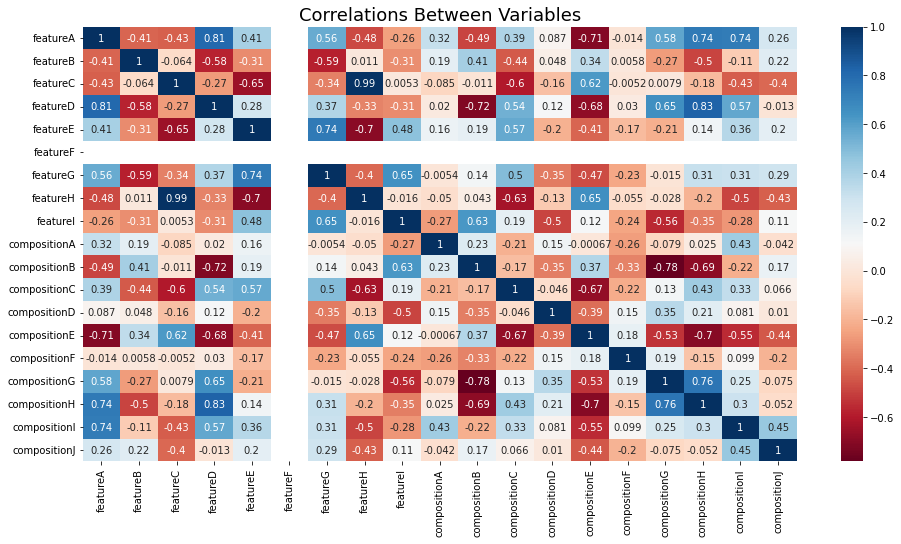

In [82]:
#correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(test.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [83]:
# dropping few columns that are unccessary after obeserving correlation matrix
#fD,cI,fH,fE,fI,cG
test = test.drop(['featureD','featureG','featureH','featureI','featureF','compositionG','compositionI'],axis=1)

In [84]:
# Checking and removing any duplicates from the data
test[test.duplicated()]
test.drop_duplicates(inplace=True)
test

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,unit
0,6,0,55,0,1,0,325435.125,1.728675,0.032407,26.637511,0.0,2.2,28.2,2.7,16.7,3.5,20.2,18.9,7
1,6,0,1638,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,7
2,17,0,1400,0,16,0,-19688.875,25.982190,0.000000,17.510663,3.6,21.4,9.7,0.0,46.7,2.6,7.7,6.1,12
3,5,0,204,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0
4,5,0,1282,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,5,0,524,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0
6996,5,0,1308,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0
6997,0,0,2867,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,5
6998,5,0,2216,0,1,0,325435.125,1.728675,0.032407,26.637511,0.0,2.2,28.2,2.7,16.7,3.5,20.2,18.9,0


In [85]:
test.nunique()

categoryA        140
categoryB          2
categoryC       1755
categoryD          3
categoryE         25
categoryF          3
featureA          23
featureB          23
featureC          19
featureE          23
compositionA       6
compositionB      20
compositionC      23
compositionD      11
compositionE      21
compositionF      20
compositionH      22
compositionJ      22
unit              19
dtype: int64

In [86]:
test = test.drop(['categoryE'],axis=1)

dropping categoryE becase there was error while prediction that is some values present in train are absent in test and viceversa

In [87]:
test["categoryA"].value_counts()

4      431
8      420
2      405
0      404
3      372
      ... 
73       1
126      1
152      1
160      1
176      1
Name: categoryA, Length: 140, dtype: int64

In [88]:
test["categoryC"].value_counts()

4       22
88      19
19      19
61      19
126     18
        ..
320      1
515      1
2419     1
2528     1
2867     1
Name: categoryC, Length: 1755, dtype: int64

Here if we observe categoryA,categoryC are numerical as the data is in continous format so we convert them using astype to float


In [89]:
# coverting the column from category to float
test = test.astype({'categoryA':'float','categoryC':'float'})
test.dtypes

categoryA       float64
categoryB        object
categoryC       float64
categoryD        object
categoryF        object
featureA        float64
featureB        float64
featureC        float64
featureE        float64
compositionA    float64
compositionB    float64
compositionC    float64
compositionD    float64
compositionE    float64
compositionF    float64
compositionH    float64
compositionJ    float64
unit             object
dtype: object

In [90]:
# retriving numerical columns
test_num=test._get_numeric_data()
test_num.head()

,categoryA,categoryC,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ
0,6.0,55.0,325435.125,1.728675,0.032407,26.637511,0.0,2.2,28.2,2.7,16.7,3.5,20.2,18.9
1,6.0,1638.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
2,17.0,1400.0,-19688.875,25.982190,0.000000,17.510663,3.6,21.4,9.7,0.0,46.7,2.6,7.7,6.1
3,5.0,204.0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
4,5.0,1282.0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0


In [91]:
# normalization for numericxal columns
test_num = (test_num - test_num.min()) / (test_num.max() - test_num.min())
test_num

,categoryA,categoryC,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ
0,0.034091,0.018959,0.614428,0.000000,0.044442,0.650690,0.0,0.000000,0.640182,0.088641,0.079160,0.271100,0.874126,0.423393
1,0.034091,0.564633,0.239591,0.112527,0.007841,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899
2,0.096591,0.482592,0.096193,1.000000,0.000000,0.387856,0.6,1.000000,0.220204,0.000000,0.684976,0.156010,0.291375,0.033506
3,0.028409,0.070321,0.239591,0.112527,0.007841,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899
4,0.028409,0.441917,0.065611,0.108628,1.000000,0.316933,0.0,0.302083,0.317821,0.000000,0.731422,0.207161,0.351981,0.304599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.028409,0.180627,0.065611,0.108628,1.000000,0.316933,0.0,0.302083,0.317821,0.000000,0.731422,0.207161,0.351981,0.304599
6996,0.028409,0.450879,0.239591,0.112527,0.007841,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899
6997,0.000000,0.988280,0.065611,0.108628,1.000000,0.316933,0.0,0.302083,0.317821,0.000000,0.731422,0.207161,0.351981,0.304599
6998,0.028409,0.763875,0.614428,0.000000,0.044442,0.650690,0.0,0.000000,0.640182,0.088641,0.079160,0.271100,0.874126,0.423393


In [92]:
# retriving categorical columns
test_cat = test.select_dtypes(include = object)
test_cat.head()

,categoryB,categoryD,categoryF,unit
0,0,0,0,7
1,0,0,0,7
2,0,0,0,12
3,0,0,0,0
4,0,0,0,0


In [93]:
test_cat.nunique()

categoryB     2
categoryD     3
categoryF     3
unit         19
dtype: int64

In [94]:
test_cat["categoryB"].value_counts()

0    6431
1      50
Name: categoryB, dtype: int64

In [95]:
test_cat["categoryD"].value_counts()

0    6299
1     144
2      38
Name: categoryD, dtype: int64

In [96]:
test_cat["categoryF"].value_counts()

0    6363
1      87
2      31
Name: categoryF, dtype: int64

In [97]:
test_cat["unit"].value_counts()

0     1109
1      775
2      614
3      567
4      460
9      420
5      404
6      365
8      360
7      339
10     299
11     267
12     199
13     102
14      92
15      58
16      47
17       2
18       2
Name: unit, dtype: int64

In [98]:
test_cat.columns

Index(['categoryB', 'categoryD', 'categoryF', 'unit'], dtype='object')

In [99]:
# dummification for categorical variables
g_dum=pd.get_dummies(test_cat)

In [100]:
g_dum.head()

,categoryB_0,categoryB_1,categoryD_0,categoryD_1,categoryD_2,categoryF_0,categoryF_1,categoryF_2,unit_0,unit_1,...,unit_17,unit_18,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,unit_9
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# concating the numerical and updated categorical columns
test_df=pd.concat([g_dum,test_num],axis=1)
test_df.head()

,categoryB_0,categoryB_1,categoryD_0,categoryD_1,categoryD_2,categoryF_0,categoryF_1,categoryF_2,unit_0,unit_1,...,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ
0,1,0,1,0,0,1,0,0,0,0,...,0.044442,0.650690,0.0,0.000000,0.640182,0.088641,0.079160,0.271100,0.874126,0.423393
1,1,0,1,0,0,1,0,0,0,0,...,0.007841,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899
2,1,0,1,0,0,1,0,0,0,0,...,0.000000,0.387856,0.6,1.000000,0.220204,0.000000,0.684976,0.156010,0.291375,0.033506
3,1,0,1,0,0,1,0,0,1,0,...,0.007841,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899
4,1,0,1,0,0,1,0,0,1,0,...,1.000000,0.316933,0.0,0.302083,0.317821,0.000000,0.731422,0.207161,0.351981,0.304599


In [102]:
test_df.shape

(6481, 41)

predicting the test(unseen)data

In [103]:
y_pred_testdf = knn.predict(test_df)

In [104]:
print(y_pred_testdf)

[0.42860915899999996, 0.7629554944, 0.34770173019999995, 0.1009654066, 0.09755708760000001, 0.028865841599999997, 0.0001846364, 0.0001423664, 0.00014186196, 0.0343342668, 0.0024641232, 0.0070086888, 0.564083107, 1.9684e-06, 0.030915513800000006, 0.0764134556, 0.0001627536, 0.16031508220000001, 0.143365043, 0.0002814654, 0.5726043816, 0.0187545858, 0.010274624199999999, 0.25677346999999995, 0.49517069080000004, 0.0241115332, 0.0006685028000000001, 1.4746399999999995e-05, 0.07810438360000001, 0.0453585634, 0.045432187400000004, 0.0600854044, 0.00037033039999999996, 0.0113008974, 0.07013419979999999, 0.0012248432, 0.017483718000000002, 0.029219389400000007, 0.00025316659999999997, 0.0374485136, 0.0025135284, 0.0005387559999999999, 0.036474096600000006, 0.0009395238, 0.5658660943999999, 0.5553382896, 0.08145018200000001, 0.030915513800000006, 0.0192810166, 0.529900533, 0.5226042917999999, 0.00021267980000000002, 0.0081943822, 0.0382684402, 0.0013524984, 0.032365846600000005, 0.6058723542, 

In [105]:
# converting the obtained y-pred_testdf values to dataframe
pred_test=pd.DataFrame(y_pred_testdf,columns=['result'])

In [106]:
pred_test.head()

,result
0,0.428609
1,0.762955
2,0.347702
3,0.100965
4,0.097557


In [107]:
# concating the test data and updated y_pred dataframe
final_test=pd.concat([test_df,pred_test],axis=1)

In [108]:
# retriving the final updated data 
final_test.head()

,categoryB_0,categoryB_1,categoryD_0,categoryD_1,categoryD_2,categoryF_0,categoryF_1,categoryF_2,unit_0,unit_1,...,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.650690,0.0,0.000000,0.640182,0.088641,0.079160,0.271100,0.874126,0.423393,0.428609
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899,0.762955
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.387856,0.6,1.000000,0.220204,0.000000,0.684976,0.156010,0.291375,0.033506,0.347702
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.771479,0.0,0.406250,0.590238,0.000000,0.388126,0.207161,0.351981,0.456899,0.100965
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.316933,0.0,0.302083,0.317821,0.000000,0.731422,0.207161,0.351981,0.304599,0.097557
